The following are the experiments from section 3.5 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 

In [0]:
#imports
import keras
keras.__version__
!pip install numpy==1.16.1
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

Using TensorFlow backend.


     |████████████████████████████████| 17.3MB 197kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.5
    Uninstalling numpy-1.17.5:
      Successfully uninstalled numpy-1.17.5


In [0]:
# preprocessing
# 

In [0]:
#import data
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



17465344/17464789 [==============================] - 1s 0us/step


In [0]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
train_labels[0]

1

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# original with 2 hidden layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 113us/step - loss: 0.0422 - acc: 0.9891 - val_loss: 0.2373 - val_acc: 0.9268
Epoch 2/5
15000/15000 [==============================] - 2s 113us/step - loss: 0.0281 - acc: 0.9927 - val_loss: 0.2576 - val_acc: 0.9239
Epoch 3/5
15000/15000 [==============================] - 2s 110us/step - loss: 0.0160 - acc: 0.9974 - val_loss: 0.3137 - val_acc: 0.9164
Epoch 4/5
15000/15000 [==============================] - 2s 111us/step - loss: 0.0266 - acc: 0.9932 - val_loss: 0.3167 - val_acc: 0.9162
Epoch 5/5
15000/15000 [==============================] - 2s 109us/step - loss: 0.0236 - acc: 0.9937 - val_loss: 0.3479 - val_acc: 0.9130


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
def train_validation_loss():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  return plt.show()

In [0]:
def train_validation_accuracy():
  plt.clf()   # clear figure
  acc_values = history_dict['acc']
  val_acc_values = history_dict['val_acc']

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  return plt.show()

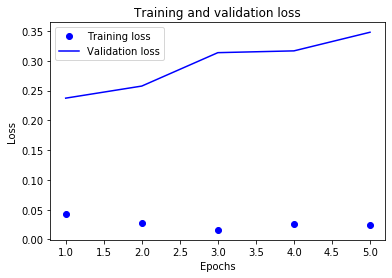

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

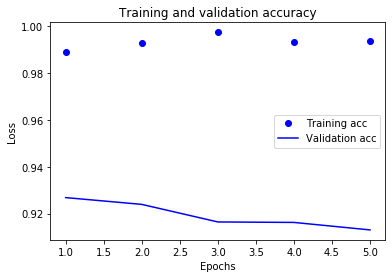

In [0]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 81us/step


In [0]:
results

[0.6950639469623565, 0.85452]

In [0]:
# first network using only 1 hidden layer


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 113us/step - loss: 0.1038 - acc: 0.9661 - val_loss: 0.1056 - val_acc: 0.9662
Epoch 2/5
15000/15000 [==============================] - 2s 111us/step - loss: 0.0853 - acc: 0.9742 - val_loss: 0.2041 - val_acc: 0.9240
Epoch 3/5
15000/15000 [==============================] - 2s 113us/step - loss: 0.0640 - acc: 0.9811 - val_loss: 0.2230 - val_acc: 0.9216
Epoch 4/5
15000/15000 [==============================] - 2s 111us/step - loss: 0.0541 - acc: 0.9841 - val_loss: 0.1892 - val_acc: 0.9363
Epoch 5/5
15000/15000 [==============================] - 2s 110us/step - loss: 0.0472 - acc: 0.9870 - val_loss: 0.2292 - val_acc: 0.9253


In [0]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 82us/step


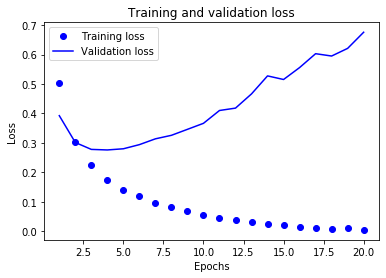

In [0]:
train_validation_loss()

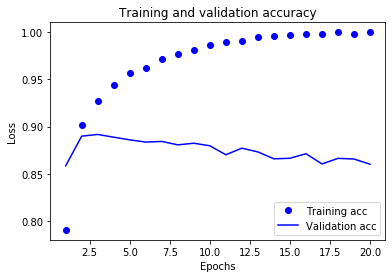

In [0]:
train_validation_accuracy()

In [0]:
results

[0.4931259100294113, 0.85872]

In [0]:
# with three hidden layers
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 2s 87us/step - loss: 0.4527 - acc: 0.8068
Epoch 2/5
25000/25000 [==============================] - 2s 77us/step - loss: 0.2479 - acc: 0.9093
Epoch 3/5
25000/25000 [==============================] - 2s 75us/step - loss: 0.1946 - acc: 0.9273
Epoch 4/5
25000/25000 [==============================] - 2s 75us/step - loss: 0.1647 - acc: 0.9393
Epoch 5/5
25000/25000 [==============================] - 2s 85us/step


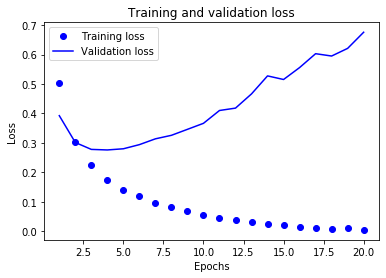

In [0]:
train_validation_loss()

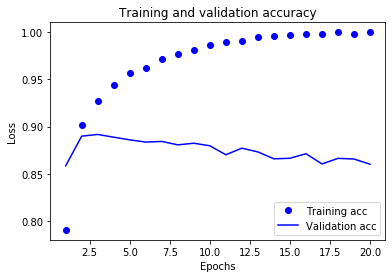

In [0]:
train_validation_accuracy()

In [0]:
results

[0.3307554241991043, 0.876]

In [0]:
# more or less hidden units

In [0]:
model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 2s 98us/step - loss: 0.4282 - acc: 0.8274
Epoch 2/5
25000/25000 [==============================] - 2s 87us/step - loss: 0.2445 - acc: 0.9092
Epoch 3/5
25000/25000 [==============================] - 2s 88us/step - loss: 0.1900 - acc: 0.9290
Epoch 4/5
25000/25000 [==============================] - 2s 87us/step - loss: 0.1599 - acc: 0.9422
Epoch 5/5
25000/25000 [==============================] - 2s 93us/step


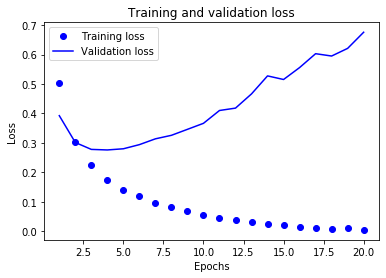

In [0]:
train_validation_loss()

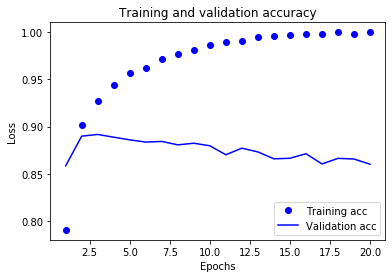

In [0]:
train_validation_accuracy()

In [0]:
results

[0.33586459095954896, 0.8764]

In [0]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 3s 136us/step - loss: 0.4208 - acc: 0.8103
Epoch 2/5
25000/25000 [==============================] - 3s 117us/step - loss: 0.2393 - acc: 0.9084
Epoch 3/5
25000/25000 [==============================] - 3s 115us/step - loss: 0.1907 - acc: 0.9252
Epoch 4/5
25000/25000 [==============================] - 3s 118us/step - loss: 0.1593 - acc: 0.9392
Epoch 5/5
25000/25000 [==============================] - 3s 109us/step


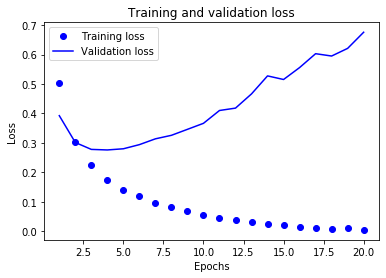

In [0]:
train_validation_loss()

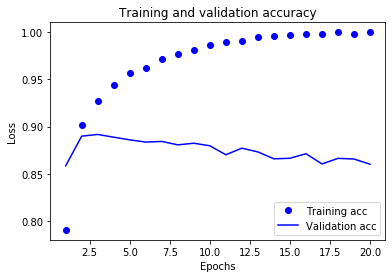

In [0]:
train_validation_accuracy()

In [0]:
results

[0.38065395970344545, 0.86596]

In [0]:
model = models.Sequential()

model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 2s 91us/step - loss: 0.4788 - acc: 0.8234
Epoch 2/5
25000/25000 [==============================] - 2s 75us/step - loss: 0.2947 - acc: 0.9048
Epoch 3/5
25000/25000 [==============================] - 2s 76us/step - loss: 0.2274 - acc: 0.9227
Epoch 4/5
25000/25000 [==============================] - 2s 75us/step - loss: 0.1897 - acc: 0.9340
Epoch 5/5
25000/25000 [==============================] - 2s 81us/step


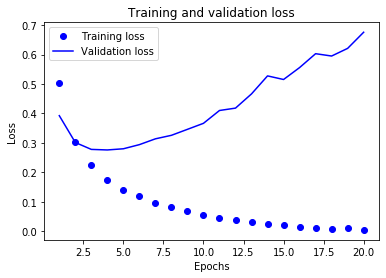

In [0]:
train_validation_loss()

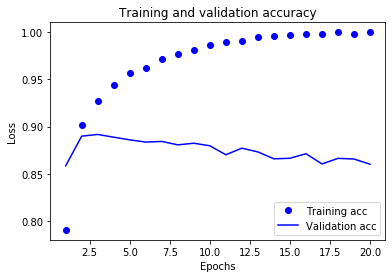

In [0]:
train_validation_accuracy()

In [0]:
results

[0.2889845003223419, 0.88544]

In [0]:
# mse vs binary_crossentropy

In [0]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 2s 97us/step - loss: 0.1418 - acc: 0.8225
Epoch 2/5
25000/25000 [==============================] - 2s 78us/step - loss: 0.0757 - acc: 0.9114
Epoch 3/5
25000/25000 [==============================] - 2s 78us/step - loss: 0.0563 - acc: 0.9332
Epoch 4/5
25000/25000 [==============================] - 2s 76us/step - loss: 0.0473 - acc: 0.9452
Epoch 5/5
25000/25000 [==============================] - 2s 95us/step


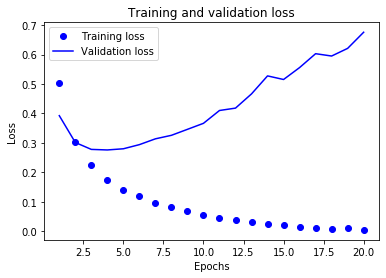

In [0]:
train_validation_loss()

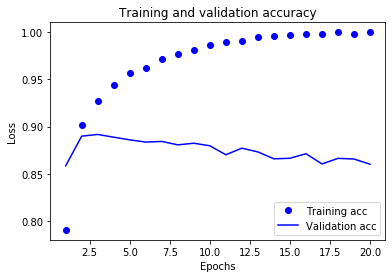

In [0]:
train_validation_accuracy()

In [0]:
results

[0.09888646246194839, 0.8666]

In [0]:
#tanh vs relu

In [0]:
model = models.Sequential()

model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 3s 101us/step - loss: 0.4338 - acc: 0.8256
Epoch 2/5
25000/25000 [==============================] - 2s 78us/step - loss: 0.2433 - acc: 0.9120
Epoch 3/5
25000/25000 [==============================] - 2s 83us/step - loss: 0.1822 - acc: 0.9339
Epoch 4/5
25000/25000 [==============================] - 2s 79us/step - loss: 0.1505 - acc: 0.9465
Epoch 5/5
25000/25000 [==============================] - 2s 85us/step


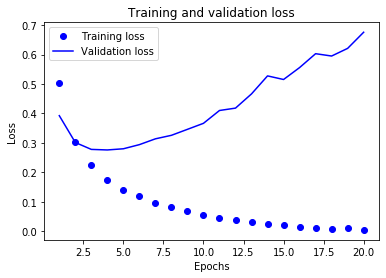

In [0]:
train_validation_loss()

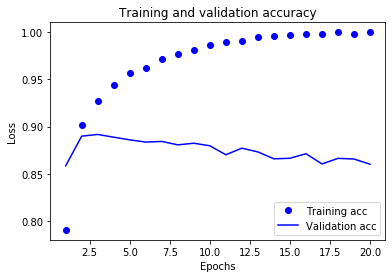

In [0]:
train_validation_accuracy()

In [0]:
results

[0.3624570939540863, 0.86864]

Through the experiments I obtained the following results:

|Hyperparameters | Values|
|----|----|
| Hidden Layers | 2|
| Activation Function | ReLu |
| Nodes per Layer | 16 |
| Optimizer | RMSProp|
| Loss Function | Binary Cross Entropy|
| Result | 85.45 %|

|Hyperparameters | Values|
|----|----|
| Hidden Layers | 1|
| Activation Function | ReLu |
| Nodes per Layer | 16 |
| Optimizer | RMSProp|
| Loss Function | Binary Cross Entropy|
| Result | 85.87 %|

|Hyperparameters | Values|
|----|----|
| Hidden Layers | 3|
| Activation Function | ReLu |
| Nodes per Layer | 16 |
| Optimizer | RMSProp|
| Loss Function | Binary Cross Entropy|
| Result | 87.6 %|

|Hyperparameters | Values|
|----|----|
| Hidden Layers | 2|
| Activation Function | ReLu |
| Nodes per Layer | 32 |
| Optimizer | RMSProp|
| Loss Function | Binary Cross Entropy|
| Result | 87.6 %|


|Hyperparameters | Values|
|----|----|
| Hidden Layers | 2|
| Activation Function | ReLu |
| Nodes per Layer | 64 |
| Optimizer | RMSProp|
| Loss Function | Binary Cross Entropy|
| Result | 86.59 %|

|Hyperparameters | Values|
|----|----|
| Hidden Layers | 2|
| Activation Function | ReLu |
| Nodes per Layer | 8 |
| Optimizer | RMSProp|
| Loss Function | Binary Cross Entropy|
| Result | 88.54 %|

|Hyperparameters | Values|
|----|----|
| Hidden Layers | 2|
| Activation Function | ReLu |
| Nodes per Layer | 16 |
| Optimizer | RMSProp|
| Loss Function | MSE|
| Result | 86.66 %|

|Hyperparameters | Values|
|----|----|
| Hidden Layers | 2|
| Activation Function | Tanh |
| Nodes per Layer | 16 |
| Optimizer | RMSProp|
| Loss Function | Binary Cross Entropy|
| Result | 86.86 %|

Overall, all of the tuning resulted in accuracy values that were fairly close together. They were all around 86-88. Some trends and observations worth noting:
- ReLu tended to have a higher accuracy than Tanh
- Models performed better with fewer nodes in their hidden layers.
- MSE returned a higher accuracy in comparison to Binary Cross Entropy

The point about using fewer nodes is interesting because intuitively, you would think having greater number of nodes would lead to a more favourable result due to being able to model to a more granular level. Given this is a one off test that was performed, it is possible that this observed trend is incorrect. The interesting thing is that sometimes a simplier solution is preferred. 

There are other experiments that you could try. Looking at this, you could try other Optimizers, like the Adam's Optimizer. You could also investigate using different activation functions like Elu or Selu. 